In [13]:
from alpha_vantage.timeseries import TimeSeries

In [14]:
key = "KEY_HERE"
ts = TimeSeries(key)

In [15]:
aapl, meta = ts.get_daily(symbol='AAPL')
print(aapl['2020-01-22']) # YY-MM-DD

{'1. open': '318.5800', '2. high': '319.9900', '3. low': '317.3100', '4. close': '317.7000', '5. volume': '25458115'}


In [16]:
import pprint
pp = pprint.PrettyPrinter(indent=3)

In [17]:
pp.pprint(aapl)

{  '2019-09-30': {  '1. open': '220.9000',
                    '2. high': '224.5800',
                    '3. low': '220.7900',
                    '4. close': '223.9700',
                    '5. volume': '26318583'},
   '2019-10-01': {  '1. open': '225.0700',
                    '2. high': '228.2200',
                    '3. low': '224.2000',
                    '4. close': '224.5900',
                    '5. volume': '36187163'},
   '2019-10-02': {  '1. open': '223.0600',
                    '2. high': '223.5800',
                    '3. low': '217.9300',
                    '4. close': '218.9600',
                    '5. volume': '35767257'},
   '2019-10-03': {  '1. open': '218.4300',
                    '2. high': '220.9600',
                    '3. low': '215.1320',
                    '4. close': '220.8200',
                    '5. volume': '30352686'},
   '2019-10-04': {  '1. open': '225.6400',
                    '2. high': '227.4900',
                    '3. low': '223.8900',


In [18]:
print(aapl['2020-01-16']['1. open'])

313.5900


In [19]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL')
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')


# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()
plt.tight_layout()
plt.grid()

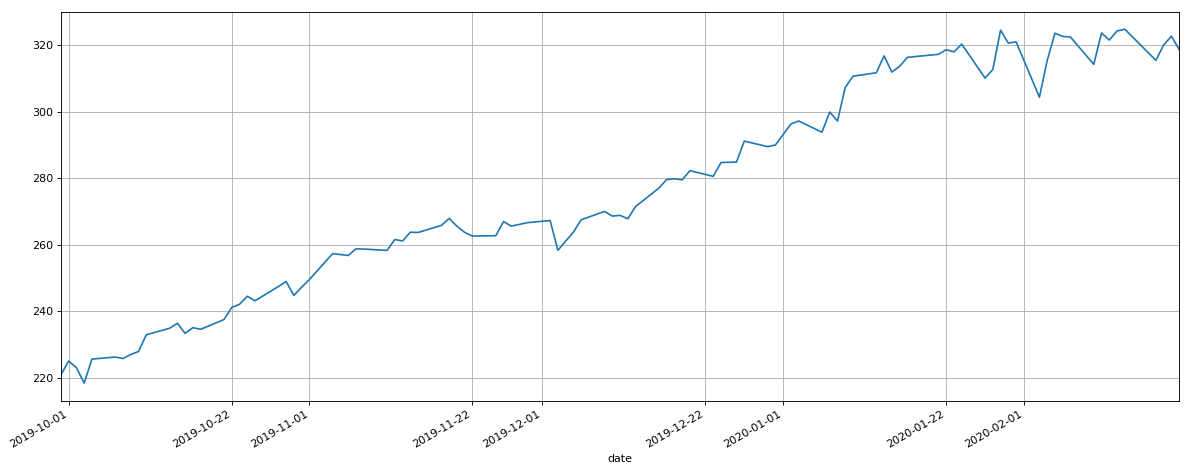

In [20]:
# Visualization
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['1. open'].plot()
plt.tight_layout()
plt.grid()

In [45]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
driver = webdriver.Firefox(executable_path=r'/Users/Study/Downloads/geckodriver')
driver.get('https://finance.yahoo.com/gainers')

# Reading the html into content object
content = driver.page_source
from bs4 import BeautifulSoup

# Using BeautifulSoup to parse it
soup = BeautifulSoup(content,'html.parser')
print(soup.prettify())

In [71]:
# converted into String
soup_text = soup.get_text() 

starting_pos = soup_text.find("\"results\":{\"rows\":[")
ending_pos = soup_text.find("\"columns\":[{\"data\":\"symbol\"}")

# Substring to the area of interests
soup_text = soup_text[starting_pos:ending_pos]

In [76]:
stock_list = soup_text.replace("symbol", "\n\nsymbol")
print(stock_list)

"results":{"rows":[{"

symbol":"DBX","shortName":"Dropbox, Inc.","longName":"Dropbox, Inc.","quoteType":"EQUITY","currency":"USD","regularMarketPrice":{"raw":22.45,"fmt":"22.45"},"regularMarketChange":{"raw":3.7350006,"fmt":"3.74"},"regularMarketChangePercent":{"raw":19.957256,"fmt":"19.96%"},"regularMarketVolume":{"raw":48276618,"fmt":"48.277M","longFmt":"48,276,618"},"averageDailyVolume3Month":{"raw":5037973,"fmt":"5.038M","longFmt":"5,037,973"},"marketCap":{"raw":9324002304,"fmt":"9.324B","longFmt":"9,324,002,304"},"fiftyTwoWeekLow":{"raw":16.08,"fmt":"16.08"},"fiftyTwoWeekHigh":{"raw":26.2,"fmt":"26.20"},"regularMarketOpen":{"raw":21.99,"fmt":"21.99"},"priceHint":2},{"

symbol":"FTMNF","shortName":"LUNDIN GOLD INC","longName":"Lundin Gold Inc.","quoteType":"EQUITY","currency":"USD","regularMarketPrice":{"raw":9.55,"fmt":"9.55"},"regularMarketChange":{"raw":1.2200003,"fmt":"1.22"},"regularMarketChangePercent":{"raw":14.645861,"fmt":"14.65%"},"regularMarketVolume":{"raw":68199,"fmt":

In [110]:
# stock_list a list of all the stock, one stock per element
stock_list = soup_text.replace("symbol", "\n\nsymbol").split('\n')

# define a output list for all
output_list = []

# Each rows is one stock
for stock in stock_list:
    data_list = stock.replace("\"", "").split(",")
    
    # Temp variables
    sybmol = ""
    longName = ""
    price = 0
    change_amt = 0
    change_pct = 0
    
    for data in data_list:    
        input_list = data.split(":")
        if 'symbol' in data:
            sybmol = input_list[1]
        elif 'longName' in data:
            longName = input_list[1]
        elif 'regularMarketPrice' in data:
            price = float(input_list[2])
        elif 'regularMarketChange:' in data:
            change_amt = float(input_list[2])
        elif 'regularMarketChangePercent' in data:
            change_pct = float(input_list[2])
    
    # If the stock symbol is vaild, append records
    if (sybmol != ""):
        output_list.append([sybmol, longName, price, change_amt, change_pct])

In [112]:
# Review the output with formatted pretty printer
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(output_list)

[   ['DBX', 'Dropbox', 22.45, 3.7350006, 19.957256],
    ['FTMNF', 'Lundin Gold Inc.', 9.55, 1.2200003, 14.645861],
    ['HMY', 'Harmony Gold Mining Company Limited', 4.13, 0.46000004, 12.534061],
    ['SFM', 'Sprouts Farmers Market', 17.99, 1.9449997, 12.122154],
    ['STMP', 'Stamps.com Inc.', 174.47, 16.479996, 10.431037],
    ['AU', 'AngloGold Ashanti Limited', 22.13, 1.9099998, 9.446093],
    ['SEM', 'Select Medical Holdings Corporation', 28.21, 2.119999, 8.125714],
    ['TXRH', 'Texas Roadhouse', 71.52, 5.169998, 7.7920094],
    ['GFI', 'Gold Fields Limited', 7.46, 0.49000025, 7.0301332],
    ['DE', 'Deere & Company', 177.43, 11.599991, 6.99511],
    ['GLOB', 'Globant S.A.', 134.82, 8.830009, 7.0085006],
    ['KGC', 'Kinross Gold Corporation', 5.96, 0.3699999, 6.6189604],
    ['BMRN', 'BioMarin Pharmaceutical Inc.', 95.16, 5.5, 6.1342845],
    ['CFX', 'Colfax Corporation', 38.9, 2.25, 6.139154],
    ['S', 'Sprint Corporation', 10.05, 0.57000065, 6.0126653],
    ['OI', 'O-I Glass'